<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib
import pylab as plt
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms, utils
import pandas as pd
from skimage import io, transform
%matplotlib inline

In [17]:
#Permisos
drive.mount('/gdrive')
#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
#%cd /gdrive/Share\Whit\Me
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
 DataSet                    'Leer imágenes-Tesis.ipynb'   set_train.csv
'Exploración de los Datos'   Pre-Porcesamiento-Data       test_images/
 Leer-Csv-Prueba.ipynb       Pre-PorcesamientoV2-Data     train.csv
'Leer CSV train.ipynb'       sample_submission.csv        train_images/


In [18]:
# Creación de la variable df_train
df_train = pd.read_csv('set_train.csv')

# Muesta los primeros registros de df_train
print(df_train.shape)
df_train.head()

(4159, 5)


,Image,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
0,77b71cd.jpg,15585 303 16985 303 18385 303 19785 303 21185 ...,-1,17327 247 18727 247 20127 108 20236 138 21527 ...,27418 448 28818 448 30218 448 31618 448 33018 ...
1,db6052a.jpg,-1,-1,1418743 539 1420143 539 1421543 539 1422943 53...,1976321 293 1977721 293 1979121 293 1980521 29...
2,4ee47a5.jpg,-1,8410 1150 9810 1150 11210 1150 12610 1150 1401...,-1,-1
3,ffc31af.jpg,-1,-1,421 689 1821 689 3221 689 4621 689 6021 689 74...,80956 218 82356 218 83756 218 85156 218 86556 ...
4,e5ec2d9.jpg,81223 853 82623 853 84023 853 85423 853 86823 ...,-1,25960 621 27360 621 28760 621 30160 621 31560 ...,1662838 360 1664238 360 1665638 360 1667038 36...


In [0]:
def rle_to_mask(rle_string, height=1400, width=2100):
  rows, cols = height, width
  if rle_string == '-1':
        return np.zeros((height, width))
  else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img

In [0]:
class CloudDataSet(Dataset):
  
  def __init__(self, csv_file, root_dir, transform=None):
        self.set_train = pd.read_csv(csv_file)
        self.root_dir =  root_dir
        self.transform = transform

  def __len__(self):
    return len(self.set_train)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
        idx = idx.tolist()
    
    image = io.imread(self.root_dir + self.set_train.iloc[idx, 0])
    mfish = self.set_train.iloc[idx, 1]
    mfish = rle_to_mask(mfish)
    mflower = self.set_train.iloc[idx, 2]
    mflower = rle_to_mask(mflower)
    mgravel = self.set_train.iloc[idx, 3]
    mgravel = rle_to_mask(mgravel)
    msugar = self.set_train.iloc[idx, 4]
    msugar = rle_to_mask(msugar)
    sample = {'image':image,'m_fish':mfish,'m_flower':mflower,'m_gravel':mgravel,'m_sugar':msugar}
    
    return sample

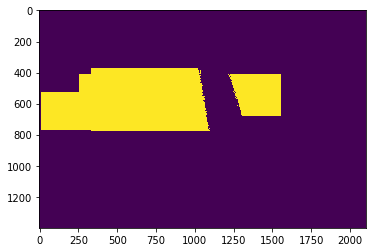

In [132]:
dataset = CloudDataSet(csv_file ='set_train.csv', root_dir='./train_images/')
sample=dataset[0]
plt.imshow(sample['m_gravel'])